## 머신러닝 실습

### 결정트리 분석
 
 #### 개녕
 - if/else 기반으로 규칙을 찾아 학습, 트리 구조의 분류규칙을 만드는 것

 ##### 정보이득지수
- 엔트로피 개념을 기반으로 함. 엔트로피는 데이터 집합을 혼잡도를 뜻함.
    - 데이터 집합의 다른 데이터가 섞여서 균일도가 떨어지면 혼잡도가 높아진다고 함.
    - 균일도가 높아지면 혼잡도가 낮아진다고 함.
- 정보이득지수는 혼잡도가 줄어들어 얻게 되는 이득을 뜻함. **1-엔트로피**로 계산

 ##### 지니계수
- 데이터의 순도를 뜻함. 
    - 지니계수가 높을수록 순도가 낮은 데이터 집합.
    - 지니계수가 0이면 완전 순수한 데이터 집합

In [3]:
## 필요라이브러리 사용등록
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

#### 데이터 수집 

##### UC 어바인 ML 연구소 스마트폰 센서데이터
- 웹사이트에서 다운로드
    - https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
- 30명의 연구 자원 봉사자가 허리에 갤럭시 S2를 착용하고, 6가지 움직음을 수행, 수집한 XYZ 3축에 대한 데이터
- 움직임 - WALKING WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

In [ ]:
## "Human Activity Recognition Using Smartphones" dataset (id=240) exists in the repository, but is not available for import.
# humanActivities = fetch_ucirepo(id=240)


In [8]:
# 피처이름
dfFeatureName = pd.read_csv('./data/features.txt', sep='\s+', header=None, names=['index','feature_name'], engine='python')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/2948236590.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfFeatureName = pd.read_csv('./data/features.txt', sep='\s+', header=None, names=['index','feature_name'], engine='python')


In [9]:
dfFeatureName.tail()

,index,feature_name
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"


In [10]:
# index 제거
featureNames = dfFeatureName.iloc[:, 1].values.tolist()

In [28]:
## X_train, X+test, y_train, y_test 데이터로드
X_train = pd.read_csv('./data/train/X_train.txt',engine='python', sep='\s+', header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/386346628.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('./data/train/X_train.txt',engine='python', sep='\s+', header=None)


In [15]:
X_test = pd.read_csv('./data/test/X_test.txt',engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/1313608496.py:1: SyntaxWarning: invalid escape sequence '\s'
  X_test = pd.read_csv('./data/test/X_test.txt',engine='python', sep='\s+', header=None)


In [17]:
y_train = pd.read_csv('./data/train/y_train.txt',engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/3325418592.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_train = pd.read_csv('./data/train/y_train.txt',engine='python', sep='\s+', header=None)


In [32]:
y_test = pd.read_csv('./data/test/y_test.txt',engine='python', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/3224216524.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv('./data/test/y_test.txt',engine='python', sep='\s+', header=None)


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [26]:
X_train.columns = featureNames

In [34]:
## 561개의 컬럼에 이름을 지정
X_train.columns = featureNames

In [35]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [36]:
X_test.columns = featureNames

In [37]:
X_test.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.010386,-0.072237,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103


In [38]:
y_train.columns = ['action']

In [40]:
y_train.tail()

,action
7347,2
7348,2
7349,2
7350,2
7351,2


In [41]:
y_test.columns = ['action']

In [42]:
y_test.tail()

,action
2942,2
2943,2
2944,2
2945,2
2946,2


In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [45]:
## Action의 개수
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [48]:
labelName = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gb/b00gj_y55zb3lhxtk9d7s87c0000gn/T/ipykernel_50035/3713291607.py:1: SyntaxWarning: invalid escape sequence '\s'
  labelName = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()


#### 분석모델 구축

In [49]:
## 결정트리 라이브러리 사용등록
from sklearn.tree import DecisionTreeClassifier

In [50]:
# 모델생성
model = DecisionTreeClassifier(random_state=40)

In [51]:
# 모델훈련
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [53]:
# 예측
y_predict = model.predict(X_test)

##### 분석지표 확인

In [52]:
## 분석지표용 라이브러리 사용등록
from sklearn.metrics import accuracy_score

In [54]:
# 정확도 판단
accuracy_score(y_test, y_predict)

0.8551068883610451

In [55]:
## 현재 하이퍼매개변수 확인
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

### 정확도 높이기

In [56]:
## 추가 라이브러리 사용등록
from sklearn.model_selection import GridSearchCV

In [57]:
prams = { 'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

gridCV = GridSearchCV(model, param_grid = prams, scoring='accuracy', cv=5, return_train_score=True)

In [58]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [63]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.848751,0.944879
1,8,0.852567,0.982692
2,10,0.849440,0.993403
3,12,0.847127,0.997212
4,16,0.849441,0.999660
5,20,0.849169,0.999966
6,24,0.849848,1.000000


In [91]:
## 하이퍼 파라미터를 변경
params = { 'max_depth' : [8, 10, 16], 'min_samples_split': [2, 20, 24]}
gridCV = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [92]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [8, 10, 16],
                         'min_samples_split': [2, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [93]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'param_min_samples_split','mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,2,0.852567,0.982692
1,8,20,0.852838,0.978781
2,8,24,0.851615,0.978237
3,10,2,0.849440,0.993403
4,10,20,0.850801,0.985786
5,10,24,0.857873,0.984256
6,16,2,0.849441,0.999660
7,16,20,0.847127,0.988473
8,16,24,0.849574,0.986738


In [94]:
gridCV.best_score_

0.8578731669418277

In [95]:
gridCV.best_params_

{'max_depth': 10, 'min_samples_split': 24}

In [96]:
gridCV.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=24, random_state=40)

In [97]:
## 최고 예측치로 다시 예측
bestModel = gridCV.best_estimator_

In [98]:
best_y_predict = bestModel.predict(X_test)

In [99]:
## 정확도
accuracy_score(y_test, best_y_predict)

0.8666440447913132

## 시각화

In [100]:
## 독립변수 561개 중 중요도가 높은 변수를 찾는 것
len(bestModel.feature_importances_)

561

In [101]:
featureImportances = bestModel.feature_importances_

In [102]:
featureTop10 = pd.Series(featureImportances, index=X_train.columns).sort_values(ascending=False)[:10]

In [103]:
featureTop10

tGravityAcc-min()-X                0.248497
fBodyAccJerk-bandsEnergy()-1,16    0.208508
angle(Y,gravityMean)               0.137694
fBodyAccMag-energy()               0.113264
tGravityAcc-arCoeff()-Z,2          0.099601
fBodyGyro-maxInds-X                0.023511
tBodyGyro-correlation()-Y,Z        0.016197
tGravityAcc-energy()-Y             0.016118
tBodyAccMag-arCoeff()1             0.012370
tBodyGyro-max()-X                  0.008973
dtype: float64

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

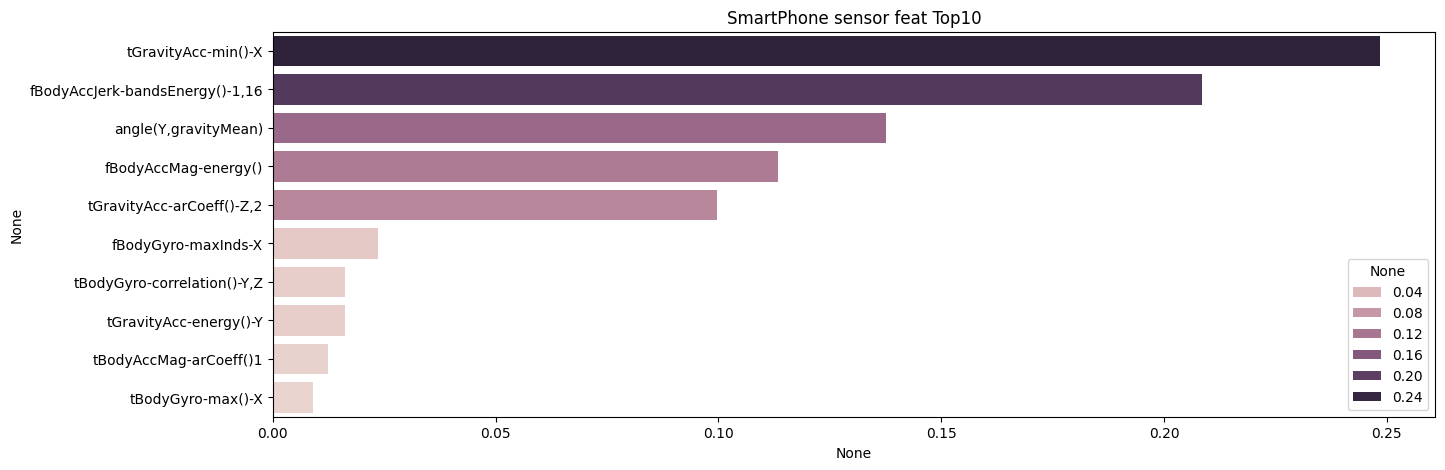

In [105]:
## 바차트
plt.figure(figsize = (15,5))
plt.title('SmartPhone sensor feat Top10')
sns.barplot(x=featureTop10, y = featureTop10.index, hue=featureTop10)
plt.show()


#### 결정트리 시각화

In [108]:
## tree 만 사용등록
from sklearn import tree

In [109]:
print(tree.export_text(bestModel))

|--- feature_52 <= 0.10
|   |--- class: 6
|--- feature_52 >  0.10
|   |--- feature_389 <= -0.97
|   |   |--- feature_559 <= 0.14
|   |   |   |--- feature_57 <= -1.00
|   |   |   |   |--- feature_560 <= -0.02
|   |   |   |   |   |--- feature_169 <= -0.98
|   |   |   |   |   |   |--- feature_107 <= 0.41
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_107 >  0.41
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_169 >  -0.98
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_560 >  -0.02
|   |   |   |   |   |--- feature_239 <= -0.83
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_239 >  -0.83
|   |   |   |   |   |   |--- class: 4
|   |   |   |--- feature_57 >  -1.00
|   |   |   |   |--- feature_129 <= -0.87
|   |   |   |   |   |--- feature_159 <= 0.42
|   |   |   |   |   |   |--- feature_52 <= 0.99
|   |   |   |   |   |   |   |--- feature_145 <= -0.69
|   |   |   |   |   |   |   |   |--- class: 

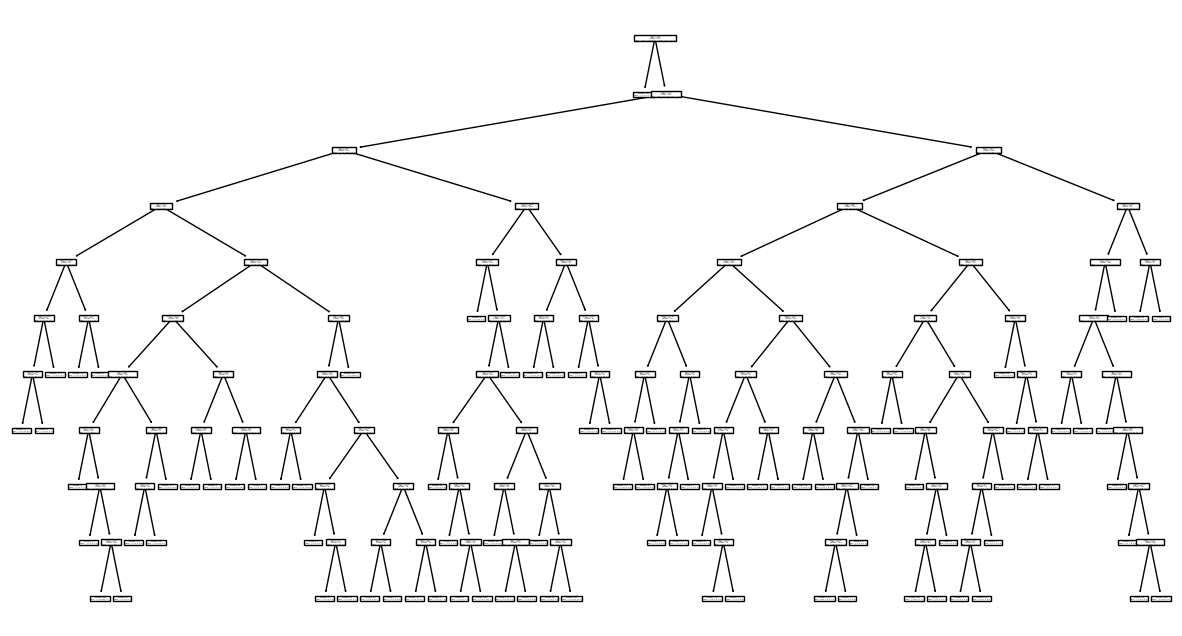

In [110]:
fig = plt.figure(figsize=(15,8))

_= tree.plot_tree(bestModel)

plt.show()

#### Graphviz 패키지 설치
- 

In [111]:
!pip3 install graphviz

12014.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 344.1 kB/s eta 0:00:00a 0:00:01


In [112]:
from sklearn.tree import export_graphviz

In [114]:
export_graphviz(bestModel, out_file='tree.dot', class_names=labelName, feature_names=featureNames, impurity=True, filled=True)

In [115]:
## graphviz 모듈 사용등록
import graphviz

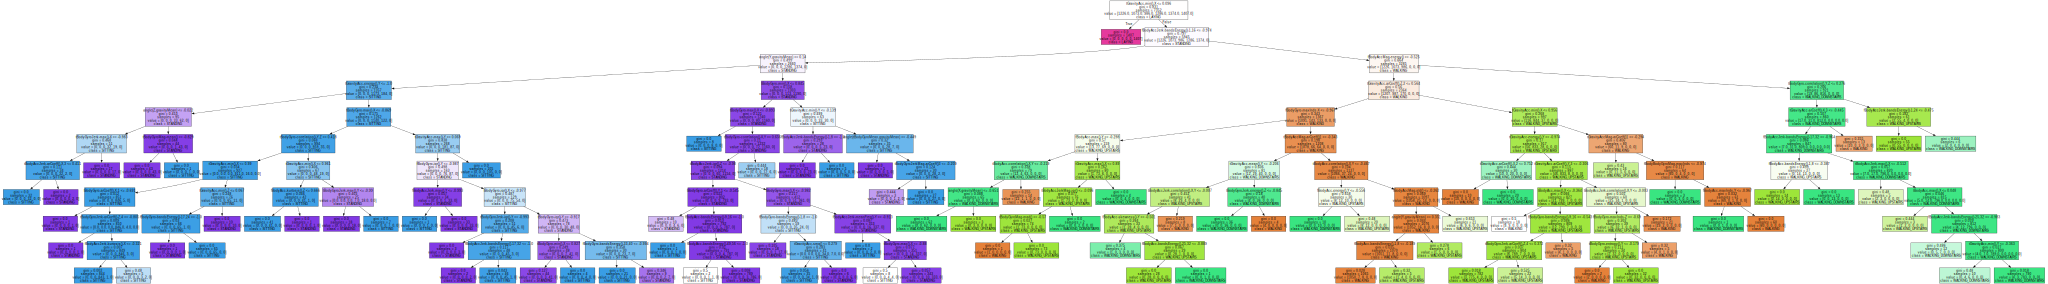

In [121]:
# scikit-learn 이미지 출력
with open('./tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### 결론
- 결정트리는 if/else의 조건가지고 만드는 모델